In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import acquire
import prepare
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [40]:
#acquire data using acquire.py
telco= acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [41]:
#shape of data
telco.shape

(7043, 24)

In [42]:
#check for datatypes
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [43]:
#do value counts on all columns
for col in telco.columns:
    print (telco[col].value_counts())
    print()

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: phone_service, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

No           

In [44]:
#total charge column is string type and has 11 spaces filled up with blanks.
#the tenure associated with them is 0
#this implies they just signed up
#we can replace those blancks with 0
telco[telco.total_charges == " "].tenure

945     0
1731    0
1906    0
2025    0
2176    0
2250    0
2855    0
3052    0
3118    0
4054    0
5433    0
Name: tenure, dtype: int64

In [45]:
# replace the empty space in total charges with 0 
#convert the column to a float
telco.total_charges = telco.total_charges.str.replace(' ', '0')
telco.total_charges = telco.total_charges.astype(float)

In [46]:
#check for categorical data
telco.nunique()

payment_type_id                4
internet_service_type_id       3
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          3
payment_type                   4
dtype: int64

In [47]:
#peek at numerical columns
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.00,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.00,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.00,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [48]:
#run cross tab to see relationship to check 
pd.crosstab(telco.contract_type, telco.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


In [49]:
#we can drop one of these, we will drop contract_type_id

In [50]:
pd.crosstab(telco.internet_service_type_id, telco.internet_service_type)

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [51]:
#we can drop of these too

In [52]:
pd.crosstab(telco.payment_type_id, telco.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [53]:
# we will drop the duplicates
telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [54]:
#we can encode categorical columns with dummy variables and concatenate them to our dataframe
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})

In [55]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1


In [20]:
#for other non binary categorical columns, use dummies
non_binary = ['multiple_lines','online_security','online_backup','device_protection','tech_support',\
               'streaming_tv','streaming_movies','contract_type', 'internet_service_type', 'payment_type']


dummy_telco = pd.get_dummies(telco[non_binary],drop_first=True)

In [21]:
dummy_telco.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [22]:
#concatenate telco with dummy_telco
telco= pd.concat([telco,dummy_telco],axis = 1)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [23]:
#drop original columns that we created dummies out off
telco = telco.drop(columns = non_binary)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,Yes,65.6,593.30,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,No,59.9,542.40,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,Yes,73.9,280.85,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,Yes,98.0,1237.85,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,Yes,83.9,267.40,...,1,0,0,0,0,1,0,0,0,1


In [24]:
#also dropped the original encoded column except churn as it is the target
encoded_col = ["gender","partner","dependents","phone_service","paperless_billing"]
telco = telco.drop(columns = encoded_col)
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,No,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,No,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,Yes,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,Yes,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,Yes,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [25]:
#check column names for clean up
telco.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'churn',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [27]:
#clean up column names
telco.columns = telco.columns.str.lower().str.replace(" ","_").str.replace("[(,)]","",regex =True)
telco.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'churn',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_no_phone_service',
 'multiple_lines_yes',
 'online_security_no_internet_service',
 'online_security_yes',
 'online_backup_no_internet_service',
 'online_backup_yes',
 'device_protection_no_internet_service',
 'device_protection_yes',
 'tech_support_no_internet_service',
 'tech_support_yes',
 'streaming_tv_no_internet_service',
 'streaming_tv_yes',
 'streaming_movies_no_internet_service',
 'streaming_movies_yes',
 'contract_type_one_year',
 'contract_type_two_year',
 'internet_service_type_fiber_optic',
 'internet_service_type_none',
 'payment_type_credit_card_automatic',
 'payment_type_electronic_check',
 'payment_type_mailed_check']

In [28]:
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,0,9,65.6,593.30,No,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,No,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,Yes,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,Yes,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,Yes,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [29]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   monthly_charges                        7043 non-null   float64
 4   total_charges                          7043 non-null   float64
 5   churn                                  7043 non-null   object 
 6   gender_encoded                         7043 non-null   int64  
 7   partner_encoded                        7043 non-null   int64  
 8   dependents_encoded                     7043 non-null   int64  
 9   phone_service_encoded                  7043 non-null   int64  
 10  paperless_billing_encoded              7043 non-null   int64  
 11  chur

In [30]:
#test
telco1 = acquire.get_telco_data()
telco1=prepare.clean_telco_data(telco1)

In [31]:
telco1.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,0,9,65.6,593.30,No,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,No,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,Yes,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,Yes,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,Yes,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [3]:
#make the function for split
def my_train_test_split_telco(telco):

     train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn)
     train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn)

     return train, validate, test 

In [4]:
#make prep function 
def prep_telco_data(telco):
    telco = clean_data_telco(telco)
    train, validate, test = my_train_test_split_telco_telco(telco)
    return train,validate,test

In [3]:
#test out the prepare 
train,validate,test = prepare.prep_telco_data(telco)

In [4]:
#explore 
train.shape,validate.shape,test.shape

((4225, 33), (1409, 33), (1409, 33))

In [5]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
5911,8319-QBEHW,0,26,39.95,1023.75,No,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2479,3547-LQRIK,0,47,26.90,1250.85,No,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
5889,8280-MQRQN,0,1,50.45,50.45,Yes,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6087,8626-PTQGE,0,69,60.05,4176.70,No,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
785,1142-IHLOO,0,51,87.55,4475.90,No,1,0,0,1,...,1,0,1,1,0,1,0,1,0,0


# EDA

Univariate Exploration

In [6]:
#this allows all columns in dataframe to be seen
pd.set_option("display.max_columns",None)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   churn                                  4225 non-null   object 
 6   gender_encoded                         4225 non-null   int64  
 7   partner_encoded                        4225 non-null   int64  
 8   dependents_encoded                     4225 non-null   int64  
 9   phone_service_encoded                  4225 non-null   int64  
 10  paperless_billing_encoded              4225 non-null   int64  
 11  c

tenure, monthly charge and total charges are the only continous variable

In [8]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.161893,32.500828,65.056142,2298.513598,0.491361,0.488521,0.306272,0.906982,0.593846,0.265325,0.093018,0.427692,0.218462,0.291598,0.218462,0.350059,0.218462,0.351006,0.218462,0.289467,0.218462,0.392189,0.218462,0.395503,0.216095,0.235503,0.439053,0.218462,0.217515,0.336805,0.224852
std,0.368397,24.532563,30.268493,2271.603284,0.499985,0.499927,0.460999,0.290492,0.491172,0.441559,0.290492,0.494803,0.413251,0.454552,0.413251,0.477045,0.413251,0.477341,0.413251,0.453569,0.413251,0.488296,0.413251,0.489016,0.411628,0.424363,0.496330,0.413251,0.412604,0.472673,0.417534
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.650000,411.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.400000,1401.150000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.150000,3865.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Takeaways

26% churn

16% are seniors

Average monthly charge is 65

Maximum monthly charge is 118

Average total charge is 2298

Maximum total charge is 8672

Almost half and half gender

Most are in thier 32nd month

Sligthly more than half have do not partners

30% have dependents

90% have phone service

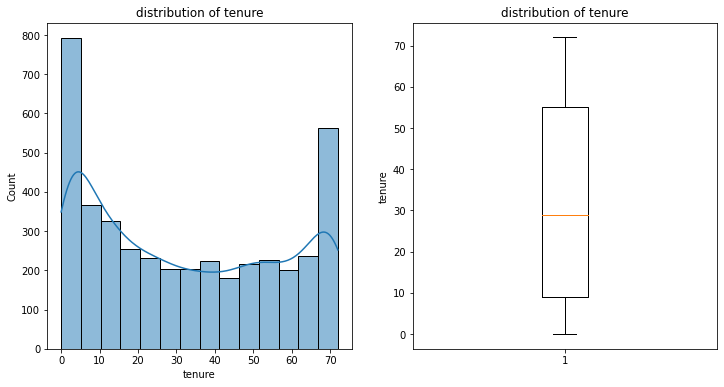

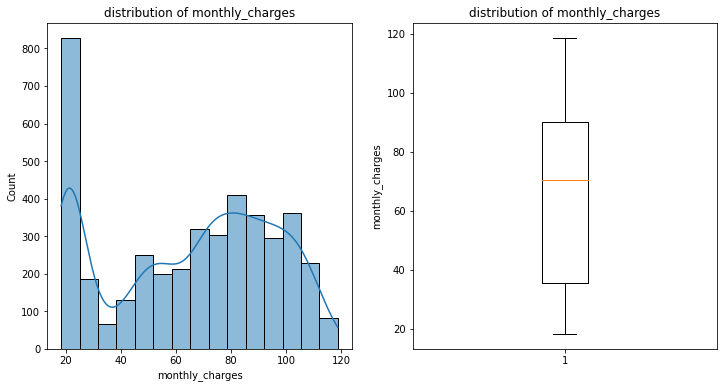

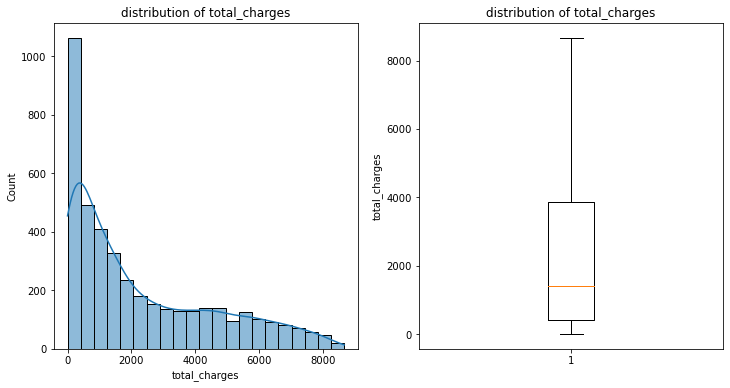

In [9]:
#lets visualize how our continous variables are behaving
numeric_var = ["tenure","monthly_charges","total_charges"]
for col in train[numeric_var]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    plt.title("distribution of " + col)
    sns.histplot(train[col], kde=True)
    
    plt.subplot(1,2,2)
    plt.title("distribution of " + col)
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()
    

Takeways:
    
Tenure ranges from 0 to 70 months, median tenure around 30 months

Slightly more than 800 people pay just $20-30, do they churn?

Some people have already paid way more than others in total charges, are those the churners?

Lets looks at some categorical variables now

In [10]:
train.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'churn', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_no_internet_service', 'online_security_yes',
       'online_backup_no_internet_service', 'online_backup_yes',
       'device_protection_no_internet_service', 'device_protection_yes',
       'tech_support_no_internet_service', 'tech_support_yes',
       'streaming_tv_no_internet_service', 'streaming_tv_yes',
       'streaming_movies_no_internet_service', 'streaming_movies_yes',
       'contract_type_one_year', 'contract_type_two_year',
       'internet_service_type_fiber_optic', 'internet_service_type_none',
       'payment_type_credit_card_automatic', 'payment_type_electronic_check',
       'payment_type_mailed_check'],
      dtype='object')

In [64]:
categorical_var = [ 'senior_citizen', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_no_internet_service', 'online_security_yes',
       'online_backup_no_internet_service', 'online_backup_yes',
       'device_protection_no_internet_service', 'device_protection_yes',
       'tech_support_no_internet_service', 'tech_support_yes',
       'streaming_tv_no_internet_service', 'streaming_tv_yes',
       'streaming_movies_no_internet_service', 'streaming_movies_yes',
       'contract_type_one_year', 'contract_type_two_year',
       'internet_service_type_fiber_optic', 'internet_service_type_none',
       'payment_type_credit_card_automatic', 'payment_type_electronic_check',
       'payment_type_mailed_check']

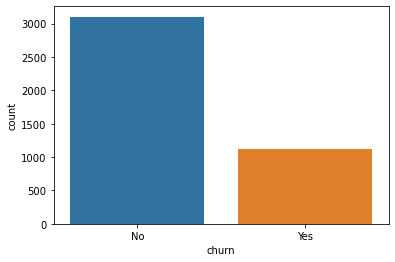

In [16]:
#count plot 
sns.countplot(x= 'churn', data=train)
plt.show()



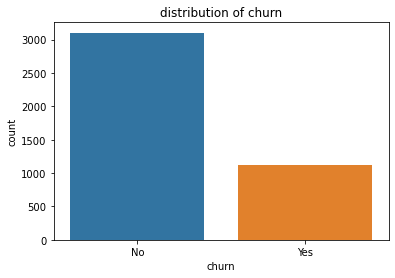

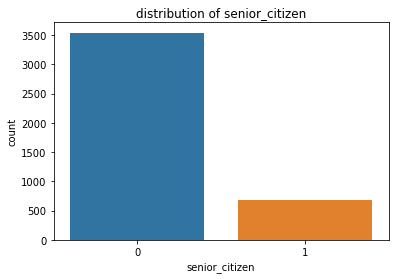

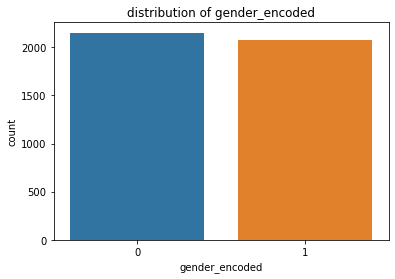

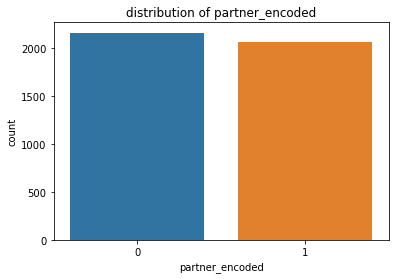

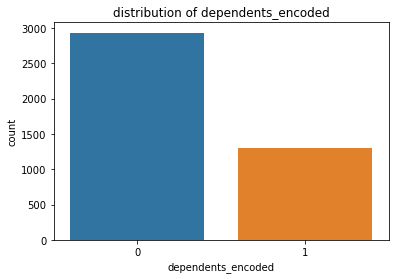

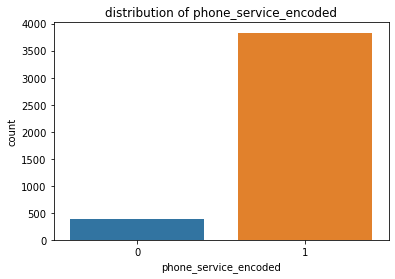

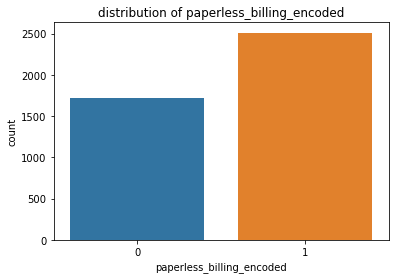

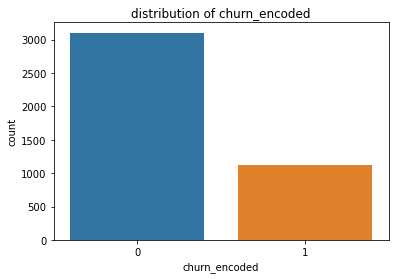

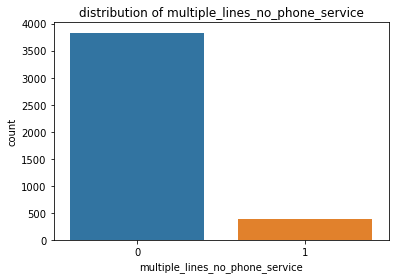

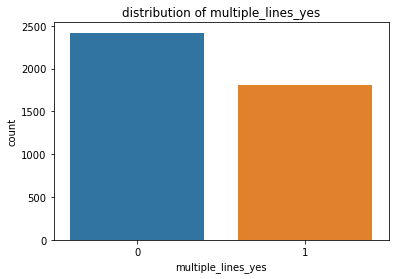

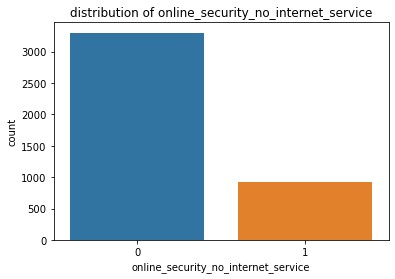

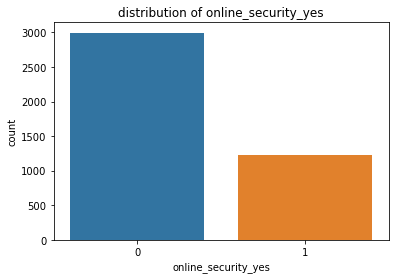

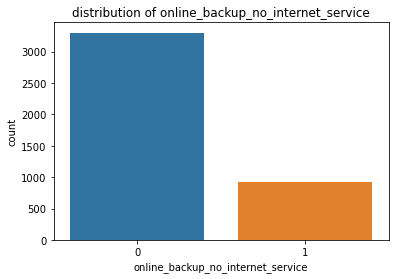

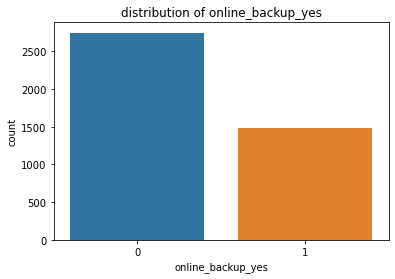

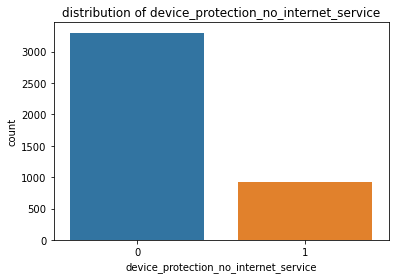

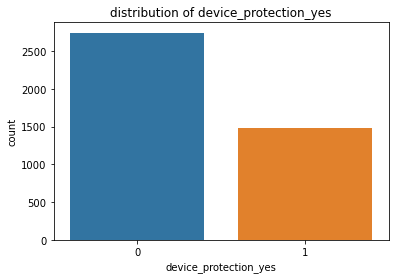

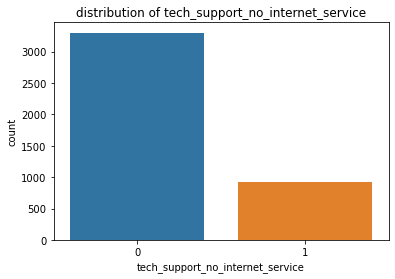

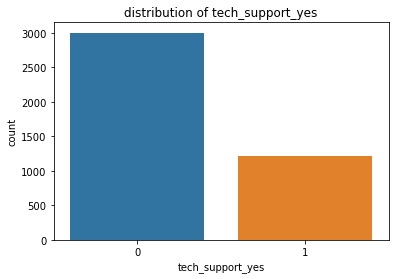

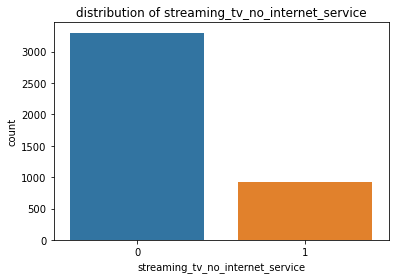

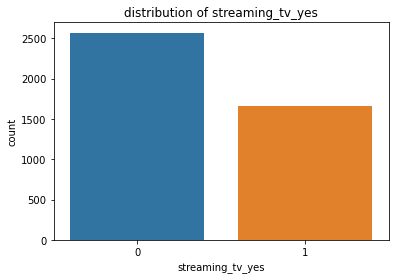

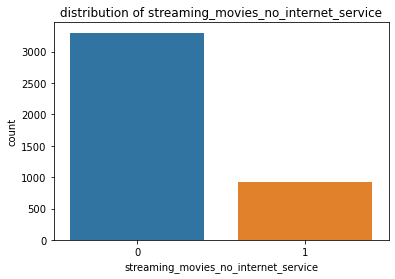

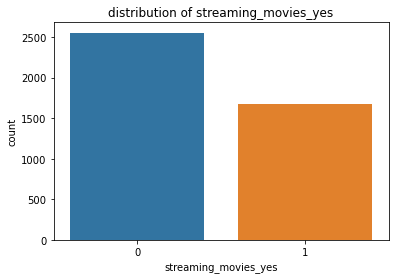

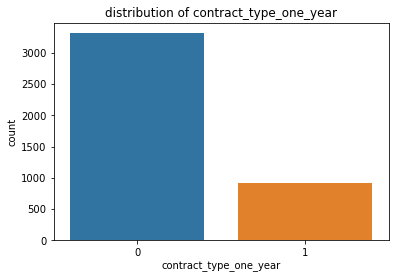

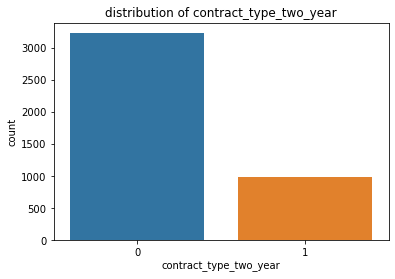

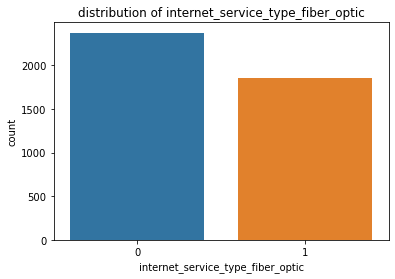

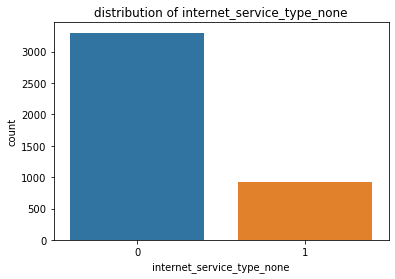

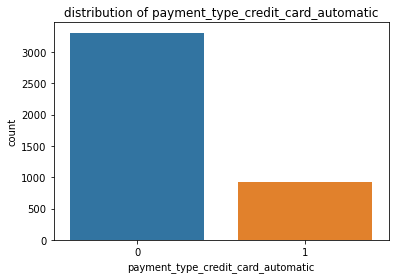

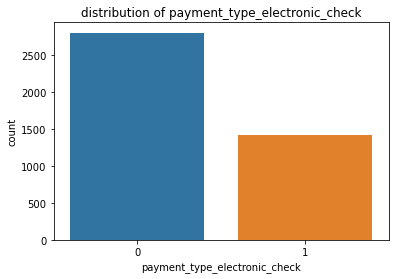

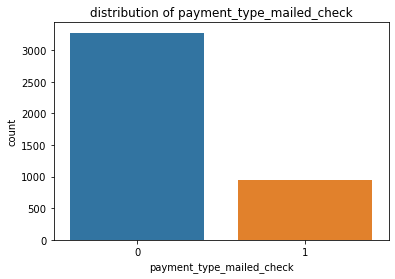

In [19]:
for col in train[categorical_var]:
    plt.title("distribution of " + col)
    sns.countplot(x = col, data = train)
    plt.show()


In [80]:
#for col in train[categorical_var]:
def cat_viz(train,col):
    plt.title("relationship of churn and " + col)
    sns.barplot(y = col, x = "churn", data = train)
    churn_average = train.churn_encoded.mean()
    plt.axhline(churn_average, label = 'churn rate')
    plt.legend(loc="upper right")
    plt.show()

    
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and churn rate are independent'
    alt_hyp = 'There is a relationship between churn rate and '+col
    observed = pd.crosstab(train.churn, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between churn rate and '+col)

def cat_analysis(train, col):
    cat_viz(train, col)
    cat_test(train, col)


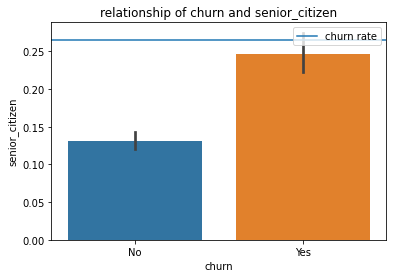

We reject the null hypothesis that senior_citizen and churn rate are independent
There is a relationship between churn rate and senior_citizen


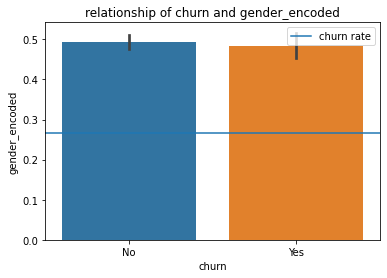

We fail to reject the null hypothesis that gender_encoded and churn rate are independent
There appears to be no relationship between churn rate and gender_encoded


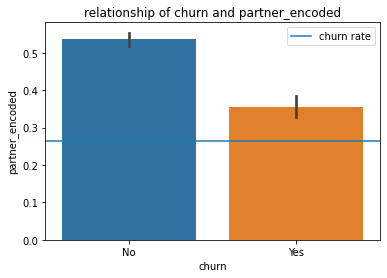

We reject the null hypothesis that partner_encoded and churn rate are independent
There is a relationship between churn rate and partner_encoded


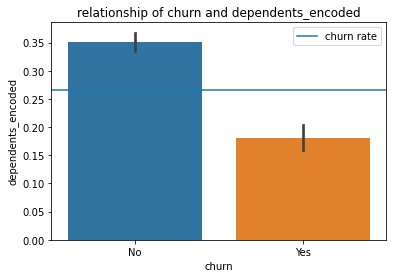

We reject the null hypothesis that dependents_encoded and churn rate are independent
There is a relationship between churn rate and dependents_encoded


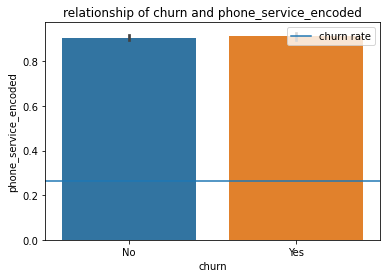

We fail to reject the null hypothesis that phone_service_encoded and churn rate are independent
There appears to be no relationship between churn rate and phone_service_encoded


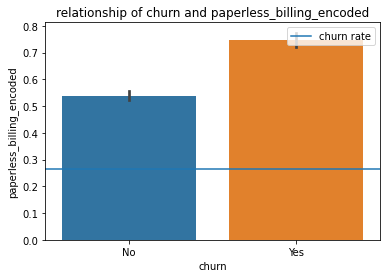

We reject the null hypothesis that paperless_billing_encoded and churn rate are independent
There is a relationship between churn rate and paperless_billing_encoded


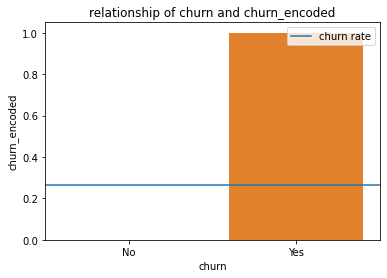

We reject the null hypothesis that churn_encoded and churn rate are independent
There is a relationship between churn rate and churn_encoded


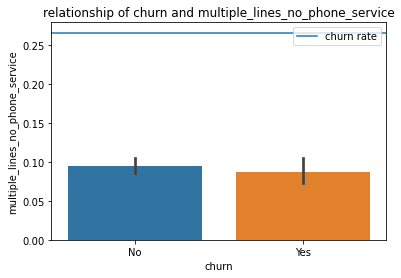

We fail to reject the null hypothesis that multiple_lines_no_phone_service and churn rate are independent
There appears to be no relationship between churn rate and multiple_lines_no_phone_service


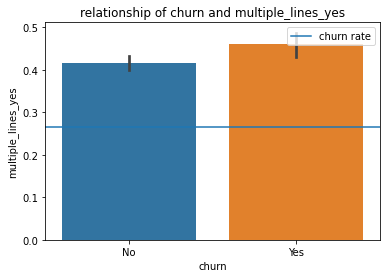

We reject the null hypothesis that multiple_lines_yes and churn rate are independent
There is a relationship between churn rate and multiple_lines_yes


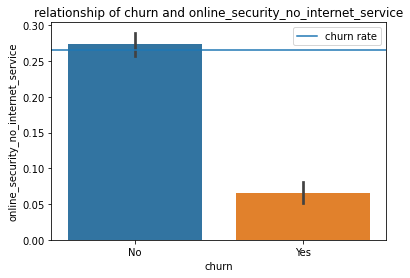

We reject the null hypothesis that online_security_no_internet_service and churn rate are independent
There is a relationship between churn rate and online_security_no_internet_service


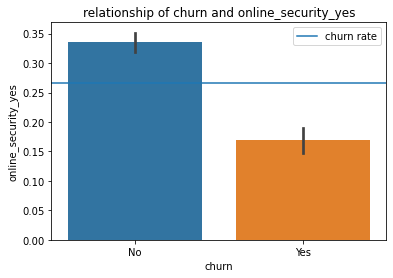

We reject the null hypothesis that online_security_yes and churn rate are independent
There is a relationship between churn rate and online_security_yes


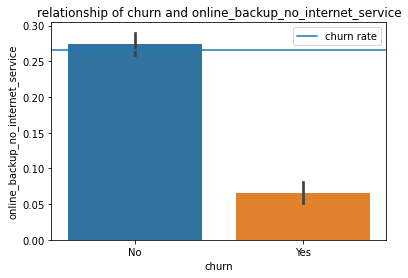

We reject the null hypothesis that online_backup_no_internet_service and churn rate are independent
There is a relationship between churn rate and online_backup_no_internet_service


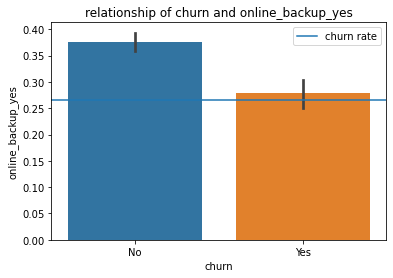

We reject the null hypothesis that online_backup_yes and churn rate are independent
There is a relationship between churn rate and online_backup_yes


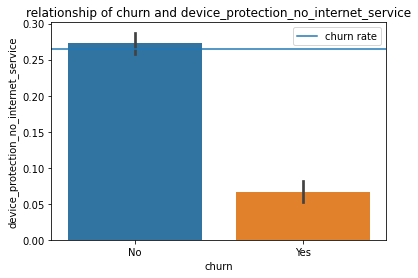

We reject the null hypothesis that device_protection_no_internet_service and churn rate are independent
There is a relationship between churn rate and device_protection_no_internet_service


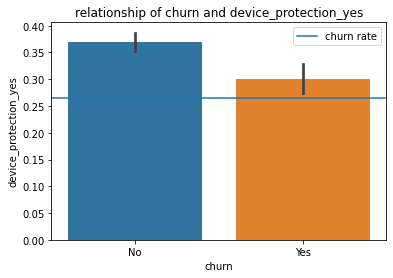

We reject the null hypothesis that device_protection_yes and churn rate are independent
There is a relationship between churn rate and device_protection_yes


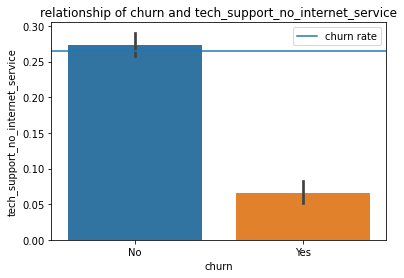

We reject the null hypothesis that tech_support_no_internet_service and churn rate are independent
There is a relationship between churn rate and tech_support_no_internet_service


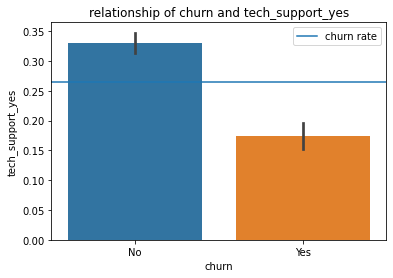

We reject the null hypothesis that tech_support_yes and churn rate are independent
There is a relationship between churn rate and tech_support_yes


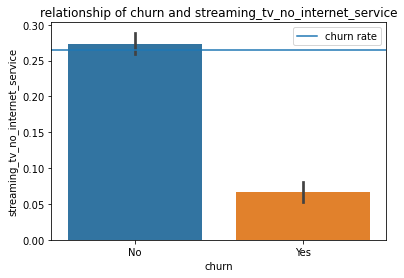

We reject the null hypothesis that streaming_tv_no_internet_service and churn rate are independent
There is a relationship between churn rate and streaming_tv_no_internet_service


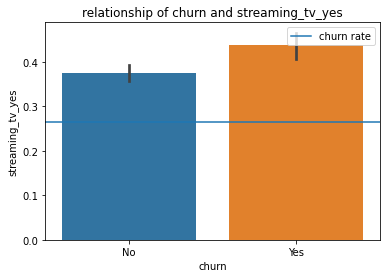

We reject the null hypothesis that streaming_tv_yes and churn rate are independent
There is a relationship between churn rate and streaming_tv_yes


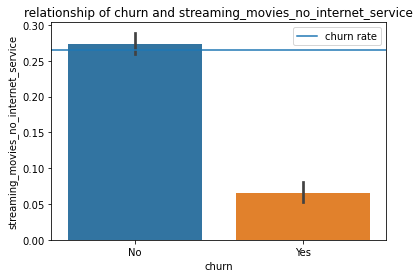

We reject the null hypothesis that streaming_movies_no_internet_service and churn rate are independent
There is a relationship between churn rate and streaming_movies_no_internet_service


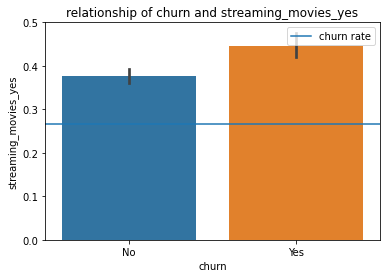

We reject the null hypothesis that streaming_movies_yes and churn rate are independent
There is a relationship between churn rate and streaming_movies_yes


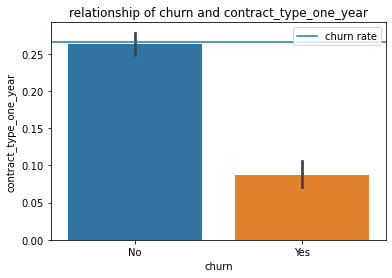

We reject the null hypothesis that contract_type_one_year and churn rate are independent
There is a relationship between churn rate and contract_type_one_year


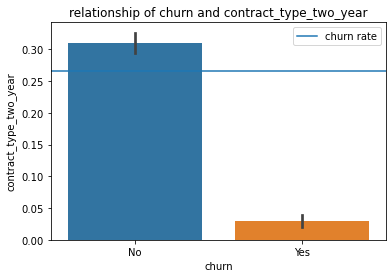

We reject the null hypothesis that contract_type_two_year and churn rate are independent
There is a relationship between churn rate and contract_type_two_year


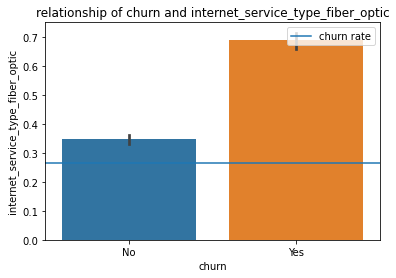

We reject the null hypothesis that internet_service_type_fiber_optic and churn rate are independent
There is a relationship between churn rate and internet_service_type_fiber_optic


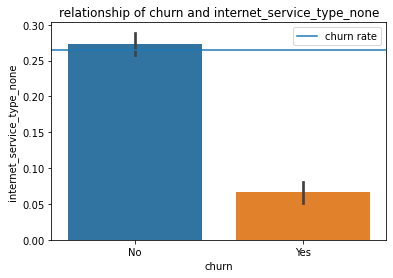

We reject the null hypothesis that internet_service_type_none and churn rate are independent
There is a relationship between churn rate and internet_service_type_none


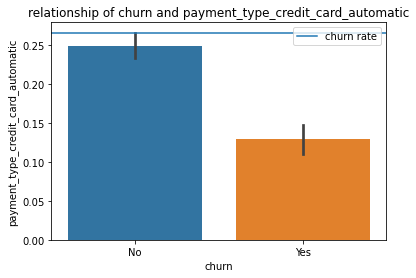

We reject the null hypothesis that payment_type_credit_card_automatic and churn rate are independent
There is a relationship between churn rate and payment_type_credit_card_automatic


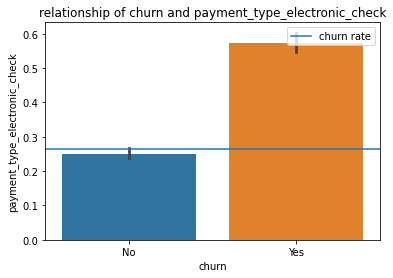

We reject the null hypothesis that payment_type_electronic_check and churn rate are independent
There is a relationship between churn rate and payment_type_electronic_check


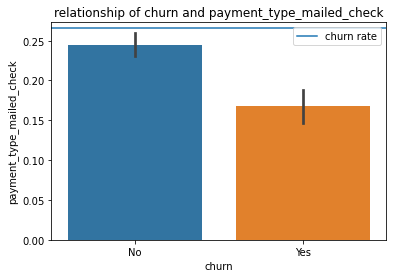

We reject the null hypothesis that payment_type_mailed_check and churn rate are independent
There is a relationship between churn rate and payment_type_mailed_check


In [81]:
for col in categorical_var:
    cat_analysis(train, col)

#categories to investigate:
senior
partner_encoded
dep
online security no internet service
online security yes
online back up no internet service
device protection no internet service
tech support no internet service
tech support yes
streaming tv no internet service
streaming movies no internet service
contract type one year
contract type two year
internet service type
payment type electronic check
billing

In [ ]:
#what about continous variable

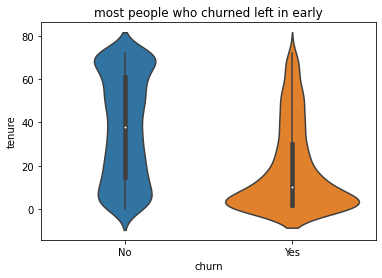

In [138]:
numeric_var = ["tenure","monthly_charges","total_charges"]
plt.title("most people who churned left in early")
sns.violinplot(x = "churn",y = "tenure", data = train)
plt.show()

most people who churned left in early

In [121]:
#H0: no difference in tenure of people who churned and who did not
#H1: difference in tenure of people who churned and who did not
train_yes_churn_tenure= train[train.churn_encoded == 1].tenure
train_no_churn_tenure= train[train.churn_encoded == 0].tenure
t,p =stats.mannwhitneyu(train_yes_churn_tenure,train_no_churn_tenure)
t,p

(911180.5, 5.517423526326908e-124)

In [ ]:
#p<0.5, reject Ho
#there is difference in tenure of people who churned and who did not

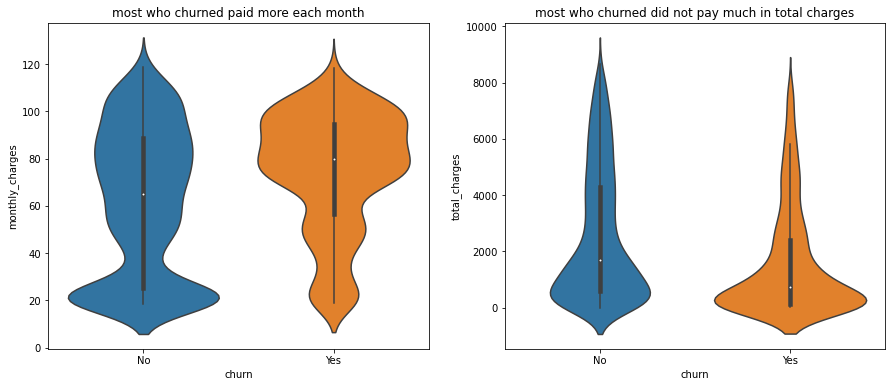

In [141]:
numeric_var = ["tenure","monthly_charges","total_charges"]

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title("most who churned paid more each month")
sns.violinplot(x = "churn",y = "monthly_charges", data = train)

plt.subplot(1,2,2)
plt.title("most who churned did not pay much in total charges")
sns.violinplot(x = "churn",y = "total_charges", data = train)
plt.show()




most who churned paid more each month

most who churned did not pay much in total charges, which may be due to tenure as they left in early months


In [124]:
#H0: no difference in monthly charges of people who churned and who did not
#H1: difference in monthly charge of people who churned and who did not
train_yes_churn= train[train.churn_encoded == 1].monthly_charges
train_no_churn= train[train.churn_encoded == 0].monthly_charges
t,p =stats.mannwhitneyu(train_yes_churn,train_no_churn)
t,p

(2150281.0, 9.335064744398014e-32)

In [ ]:
#p<0.5, reject Ho
#there is difference in monthly charge of people who churned and who did not

In [125]:
#H0: no difference in total charges of people who churned and who did not
#H1: difference in total charge of people who churned and who did not
train_yes_churn= train[train.churn_encoded == 1].total_charges
train_no_churn= train[train.churn_encoded == 0].total_charges
t,p =stats.mannwhitneyu(train_yes_churn,train_no_churn)
t,p

(1225767.0, 8.156172948241676e-49)

In [ ]:
#p<0.5, reject Ho
#there is difference in total charge of people who churned and who did not

lets see how tenure, monthly charge, total charge relate with each other

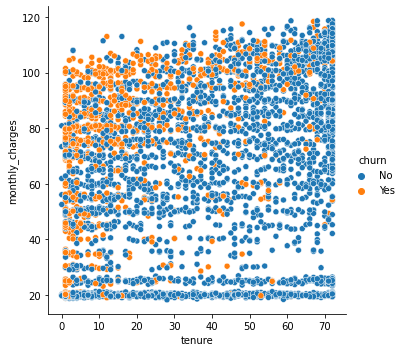

In [153]:
sns.relplot(x = "tenure", y="monthly_charges", hue = "churn", data = train)


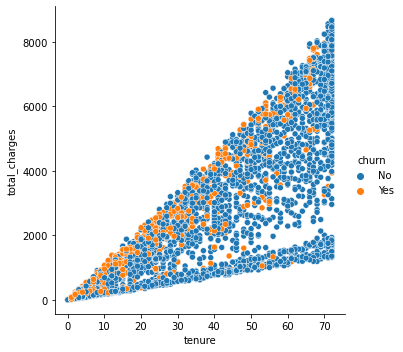

In [154]:
sns.relplot(x = "tenure", y="total_charges", hue = "churn", data = train)

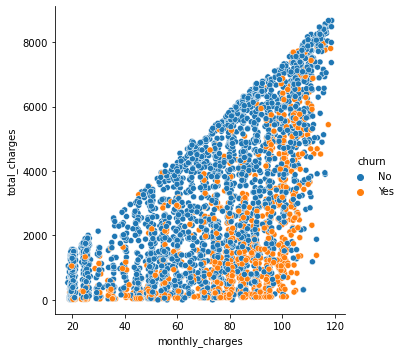

In [155]:
sns.relplot(x = "monthly_charges", y="total_charges", hue = "churn", data = train)

In [164]:
pd.options.display.max_rows = 1000

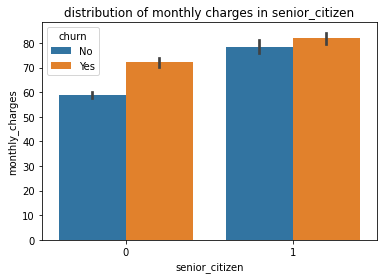

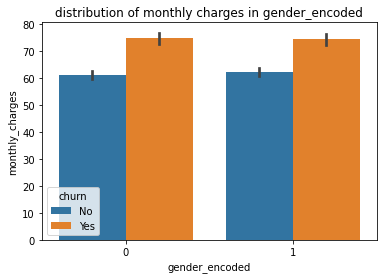

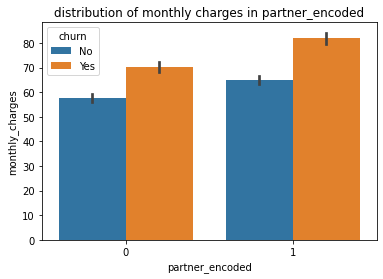

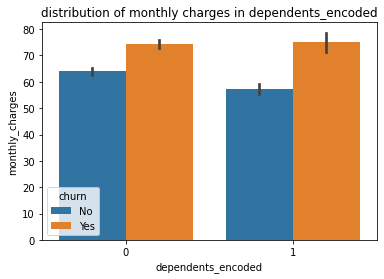

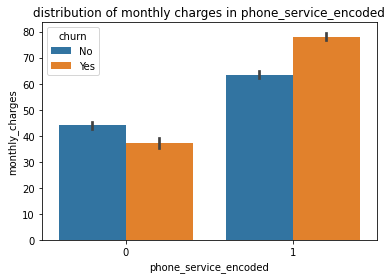

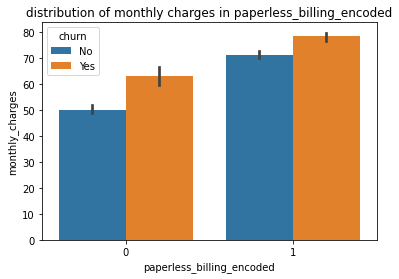

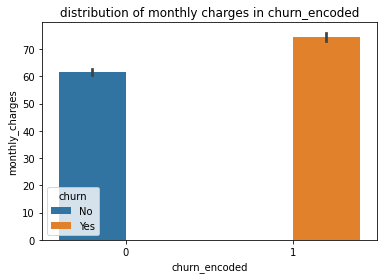

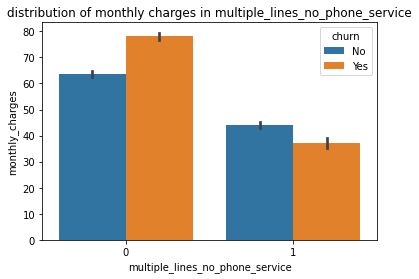

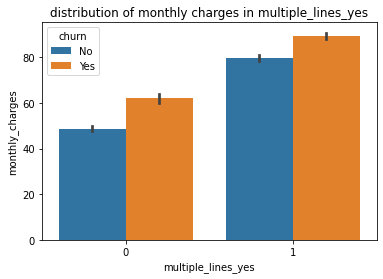

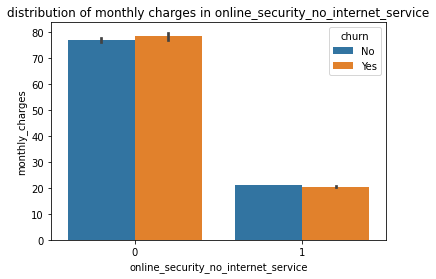

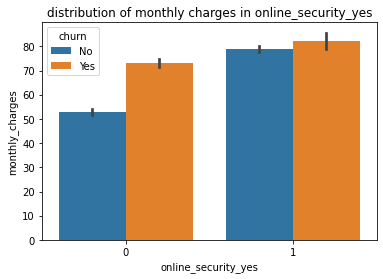

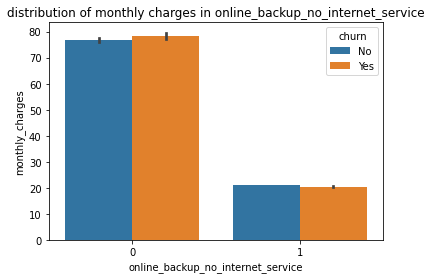

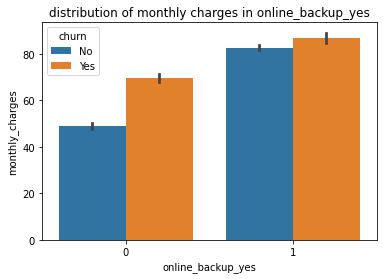

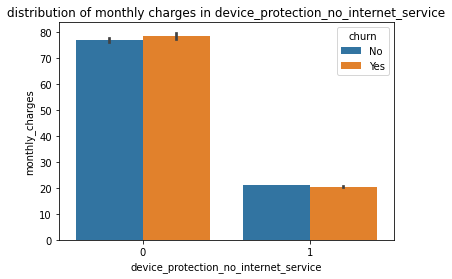

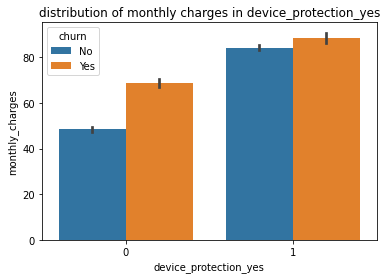

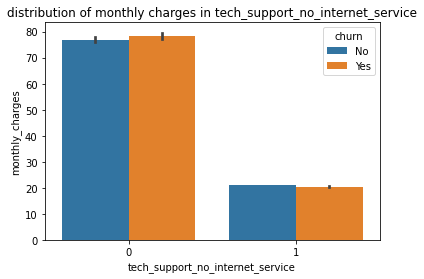

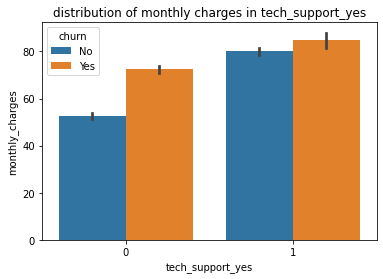

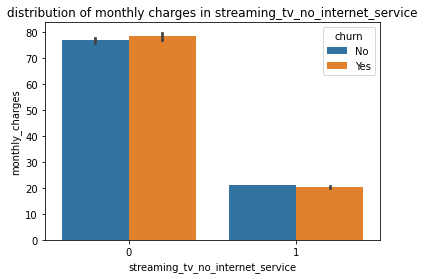

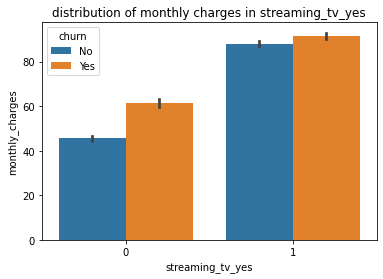

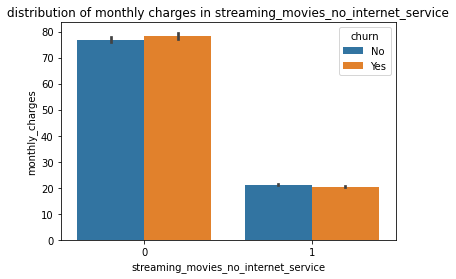

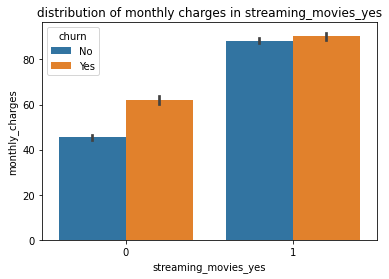

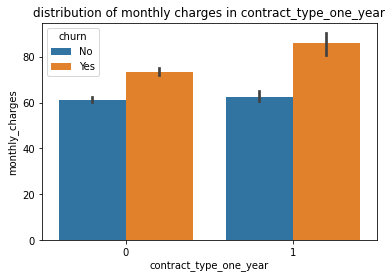

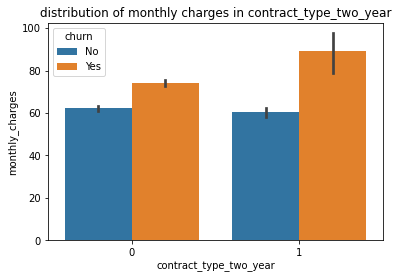

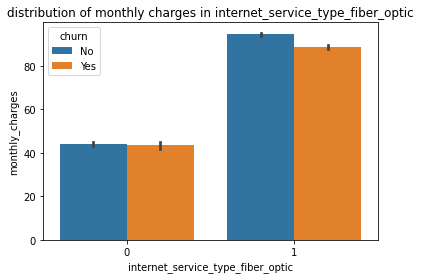

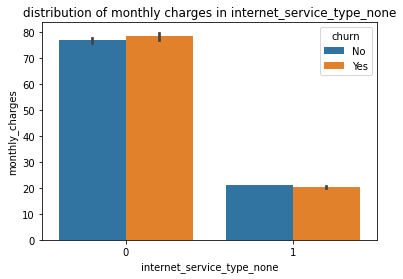

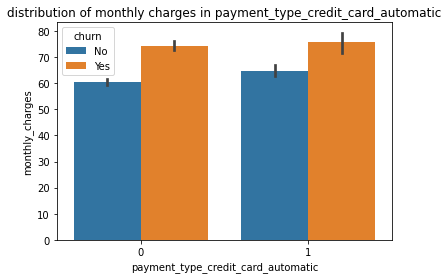

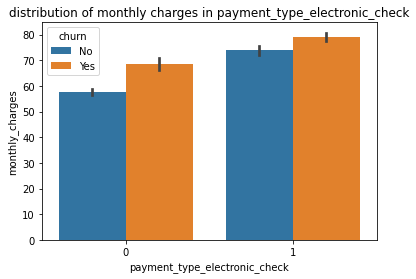

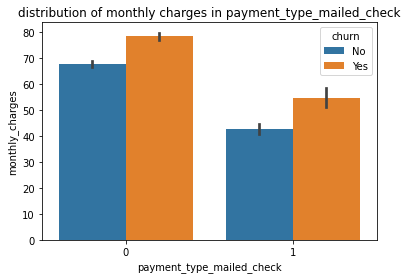

In [167]:

#montly charge, service type and churn
for col in train[categorical_var]:
    plt.title("distribution of monthly charges in " + col)
    sns.barplot(x = col, y = "monthly_charges", hue = "churn", data = train)
    plt.show()